Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

Посмотрите на распределение признака для числовых переменных, устраните выбросы.

Оцените количество уникальных значений для номинативных переменных.

По необходимости преобразуйте данные.

Проведите корреляционный анализ количественных переменных.

Отберите не коррелирующие переменные.

Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
display(math.head(20))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## school
---
аббревиатура школы, в которой учится ученик

In [5]:
print(math.school.unique())

['GP' 'MS']


In [6]:
pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


*У данного показателя всего два уникальных значения, то есть данные собирались в двух школах. Так как об этиш школах ничего больше не известно, на основе этой информации невозможно строить какие-либо выводы, полезные для будущей модели - удаляем.*

In [7]:
math.drop(['school'], inplace = True, axis = 1)

## sex
---
пол ученика ('F' - женский, 'M' - мужской)

In [8]:
print(math.sex.unique())

['F' 'M']


In [9]:
pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


*Всё ок, пустых значений нет, значения распределены почти поровну*

## age
---
возраст ученика (от 15 до 22)

In [10]:
print(math.age.unique())

[18 17 15 16 19 22 20 21]


In [11]:
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

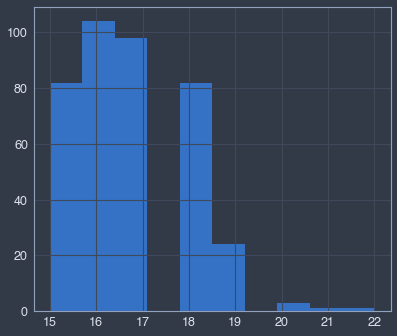

In [12]:
math.age.hist()
math.age.describe()

*Пустых значений нет, возраст 20 - 22 можно отнести к выбросам, наблюдений слишком мало*

## address
---
тип адреса ученика ('U' - городской, 'R' - за городом)

In [13]:
print(math.address.unique())

['U' nan 'R']


In [14]:
# заменяем nan на None 
math.address = math.address.apply(lambda x: None if pd.isnull(x) else x)

In [15]:
pd.DataFrame(math.address.value_counts())

,address
U,295
R,83


*Всё ок, есть пустые значения*

## famsize
---
размер семьи ('LE3' <= 3, 'GT3' >3)

In [16]:
print(math.famsize.unique())

[nan 'GT3' 'LE3']


In [17]:
# заменяем nan на None 
math.famsize = math.famsize.apply(lambda x: None if pd.isnull(x) else x)

In [18]:
pd.DataFrame(math.famsize.value_counts())

,famsize
GT3,261
LE3,107


*Всё ок*

## Pstatus
---
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [19]:
print(math.Pstatus.unique())

['A' nan 'T']


In [24]:
# заменяем nan на None 
math.Pstatus = math.Pstatus.apply(lambda x: None if pd.isnull(x) else x)

In [26]:
pd.DataFrame(math.Pstatus.value_counts())

,Pstatus
T,314
A,36


*45 пустых значений*

## Medu
---
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [37]:
print(math.Medu.unique())

[ 4.  1.  3.  2. nan  0.]


In [83]:
math.Medu = math.Medu.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [84]:
print(math.Medu.unique())

[ 4.  1.  3.  2. nan  0.]


In [41]:
pd.DataFrame(math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

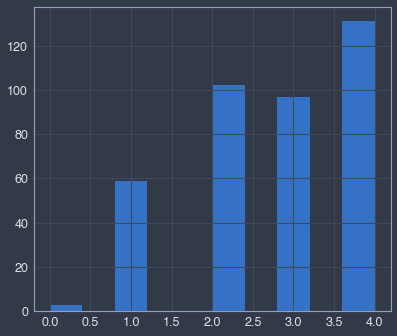

In [44]:
math.Medu.hist()
math.Medu.describe()

Выброс - 0, 3 пустых значения

## Fedu
---
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [51]:
print(math.Fedu.unique())

[ 4.  1.  2.  3. 40. nan  0.]


In [53]:
pd.DataFrame(math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [79]:
math.Fedu = math.Fedu.apply(lambda x: None if pd.isnull(x) else None if x == '' else x)

In [80]:
print(math.Fedu.unique())

[4. 1. 2. 3. 0.]


In [60]:
math = math.loc[math.Fedu <= 4]

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

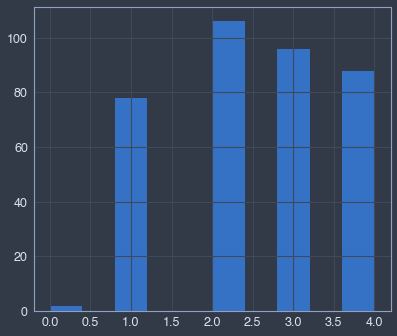

In [64]:
math.Fedu.hist()
math.Fedu.describe()

40 - выброс

## Mjob
---
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [66]:
pd.DataFrame(math.Mjob.value_counts())

,Mjob
other,125
services,90
at_home,57
teacher,48
health,31


In [68]:
print(math.Mjob.unique())

['at_home' 'health' 'other' 'services' 'teacher' nan]


In [70]:
math.Mjob = math.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [71]:
print(math.Mjob.unique())

['at_home' 'health' 'other' 'services' 'teacher' None]


*Всё ок*

## Fjob
---
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [75]:
print(math.Fjob.unique())

['teacher' 'other' nan 'health' 'services' 'at_home']


In [76]:
math.Mjob = math.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [93]:
pd.DataFrame(math.Fjob.value_counts())

,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


*Всё ок, 36 пустых значений*

## reason
---
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [86]:
print(math.reason.unique())

['course' 'other' 'home' 'reputation' nan]


In [92]:
math.reason = math.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [85]:
pd.DataFrame(math.reason.value_counts())

,reason
course,128
reputation,98
home,96
other,32


*Всё ок, 17 пустых*

## guardian
---
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [95]:
print(math.guardian.unique())

['mother' 'father' 'other' nan]


In [96]:
math.guardian = math.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [97]:
print(math.guardian.unique())

['mother' 'father' 'other' None]


In [98]:
pd.DataFrame(math.guardian.value_counts())

,guardian
mother,236
father,78
other,26


*31 пустое*

## traveltime
---
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [99]:
print(math.traveltime.unique())

[ 2.  1.  3. nan  4.]


In [102]:
pd.DataFrame(math.traveltime.value_counts())

,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


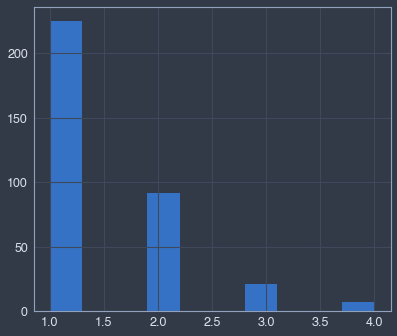

In [103]:
math.traveltime.hist()

*28 empty*

## studytime
---
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [104]:
print(math.studytime.unique())

[ 2.  3.  1. nan  4.]


In [105]:
pd.DataFrame(math.studytime.value_counts())

,studytime
2.0,182
1.0,98
3.0,58
4.0,25


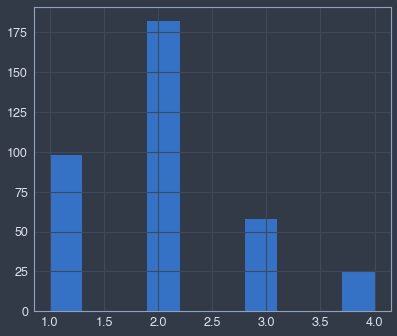

In [106]:
math.studytime.hist()

*7 empty*

*! studytime, granular column looks like completely correlated*

## failures
---
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [107]:
print(math.failures.unique())

[ 0.  3.  2.  1. nan]


In [108]:
pd.DataFrame(math.failures.value_counts())

,failures
0.0,277
1.0,45
3.0,15
2.0,14


*22 empty*

## schoolsup
---
дополнительная образовательная поддержка (yes или no)

In [109]:
print(math.schoolsup.unique())

['yes' 'no' nan]


In [110]:
math.schoolsup = math.schoolsup.apply(lambda x: None if pd.isnull(x) else x)

In [113]:
print(math.schoolsup.unique())

array(['yes', 'no', None], dtype=object)

In [112]:
pd.DataFrame(math.schoolsup.value_counts())

,schoolsup
no,314
yes,47


## famsup
---
семейная образовательная поддержка (yes или no)

In [115]:
print(math.famsup.unique())

['no' 'yes' nan]


In [118]:
math.famsup = math.famsup.apply(lambda x: None if pd.isnull(x) else x)
print(math.famsup.unique())

['no' 'yes' None]


In [119]:
pd.DataFrame(math.famsup.value_counts())

,famsup
yes,204
no,131


## paid
---
дополнительные платные занятия по математике (yes или no)

In [120]:
print(math.paid.unique())

['no' nan 'yes']


In [121]:
math.paid = math.paid.apply(lambda x: None if pd.isnull(x) else x)
print(math.paid.unique())

['no' None 'yes']


In [122]:
pd.DataFrame(math.paid.value_counts())

,paid
no,188
yes,145


## activities
---
дополнительные внеучебные занятия (yes или no)

In [123]:
print(math.activities.unique())

['no' 'yes' nan]


In [124]:
math.activities = math.activities.apply(lambda x: None if pd.isnull(x) else x)
print(math.activities.unique())

['no' 'yes' None]


In [125]:
pd.DataFrame(math.paid.value_counts())

,paid
no,188
yes,145


## nursery
---
посещал детский сад (yes или no)

In [127]:
print(math.nursery.unique())

['yes' 'no' nan]


In [128]:
math.nursery = math.nursery.apply(lambda x: None if pd.isnull(x) else x)
print(math.nursery.unique())

['yes' 'no' None]


In [138]:
pd.DataFrame(math.nursery.value_counts())

,nursery
yes,279
no,75


## higher
---
хочет получить высшее образование (yes или no)

In [136]:
print(math.higher.unique())

['yes' nan 'no' None]


In [137]:
math.higher = math.higher.apply(lambda x: None if pd.isnull(x) else x)
print(math.higher.unique())

['yes' None 'no']


In [139]:
pd.DataFrame(math.higher.value_counts())

,higher
yes,333
no,19


## internet
---
наличие интернета дома (yes или no)

In [140]:
print(math.internet.unique())

[nan 'yes' 'no']


In [141]:
math.higher = math.higher.apply(lambda x: None if pd.isnull(x) else x)
print(math.higher.unique())

['yes' None 'no']


In [142]:
pd.DataFrame(math.internet.value_counts())

,internet
yes,283
no,54


## romantic
---
в романтических отношениях (yes или no)

In [144]:
math.romantic = math.romantic.apply(lambda x: None if pd.isnull(x) else x)
print(math.romantic.unique())

['no' None 'yes']


In [145]:
pd.DataFrame(math.romantic.value_counts())

,romantic
no,226
yes,116


## famrel
---
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [146]:
print(math.famrel.unique())

[ 4.  5.  3. nan -1.  2.  1.]


In [148]:
math = math.loc[math.famrel >= 1]

In [149]:
print(math.famrel.unique())

[4. 5. 3. 2. 1.]


In [150]:
pd.DataFrame(math.famrel.value_counts())

,famrel
4.0,167
5.0,95
3.0,58
2.0,16
1.0,7


## freetime
---
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [152]:
print(math.freetime.unique())

[ 3.  2.  4.  1.  5. nan]


In [154]:
pd.DataFrame(math.freetime.value_counts())

,freetime
3.0,133
4.0,96
2.0,54
5.0,34
1.0,17


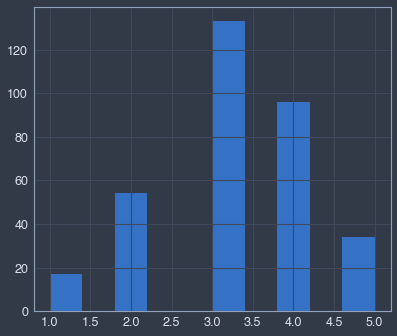

In [155]:
math.freetime.hist()

## goout
---
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [157]:
print(math.goout.unique())

[ 4.  3.  2.  1.  5. nan]


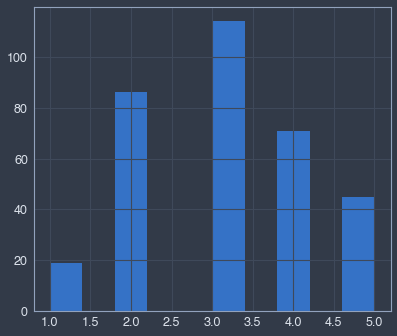

In [158]:
math.goout.hist()

## health
---
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [159]:
print(math.health.unique())

[ 3.  5.  1.  2.  4. nan]


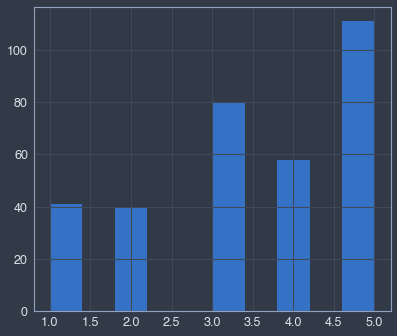

In [162]:
math.health.hist()

## absences
---
количество пропущенных занятий

In [169]:
pd.DataFrame(math.absences.value_counts())

,absences
0.0,95
2.0,53
4.0,47
6.0,27
8.0,20
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


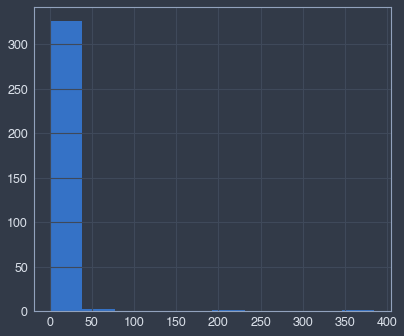

In [168]:
math.absences.describe()
math.absences.hist()

*Очевидно, основная часть значений лежит где-то в промежутке от 0 до 50, остальное можно считать выбросами. Посчитаем:*

In [177]:
median = math.absences.median()
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [181]:
# отсеяла значения, превышающие верхнюю границу выбросов
math = math.loc[math.absences <= 20]

## score
---
баллы по госэкзамену по математике

In [171]:
print(math.score.unique())

[ 30.  50.  75.  55.  45.  80.  70.  25.  60.  40.  85.  90.  65. 100.
  35.  95.   0.  nan  20.]


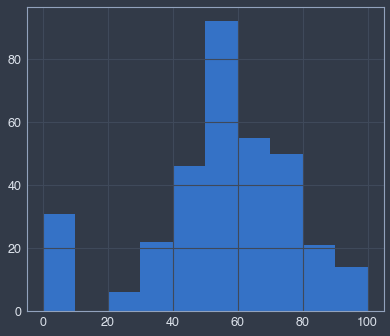

In [172]:
math.score.hist()

In [180]:
display(math)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,None,A,4.0,4.0,teacher,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,GT3,None,1.0,1.0,other,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,LE3,T,1.0,1.0,other,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,GT3,T,4.0,2.0,None,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,M,18,R,LE3,T,3.0,2.0,other,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


    pd.DataFrame(cacao.company.value_counts())